<a href="https://colab.research.google.com/github/Madhav2204/LGMVIP-DataScience/blob/main/Task_7_Develop_A_Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author : Madhav Shrivastava**

### Task-7 : Develop A Neural Network That Can Read Handwriting

Problem Statement : Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

 Dataset : It can be seen on MNIST or can find https://en.wikipedia.org/wiki/MNIST_database

In [ ]:
import keras
import tensorflow as tf 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = []
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 164s 346ms/step - loss: 2.2905 - accuracy: 0.1304 - val_loss: 2.2582 - val_accuracy: 0.2975
Epoch 2/10
469/469 [==============================] - 157s 334ms/step - loss: 2.2369 - accuracy: 0.2460 - val_loss: 2.1915 - val_accuracy: 0.4685
Epoch 3/10
469/469 [==============================] - 159s 338ms/step - loss: 2.1683 - accuracy: 0.3547 - val_loss: 2.1024 - val_accuracy: 0.5452
Epoch 4/10
469/469 [==============================] - 157s 335ms/step - loss: 2.0712 - accuracy: 0.4441 - val_loss: 1.9766 - val_accuracy: 0.6261
Epoch 5/10
469/469 [==============================] - 157s 336ms/step - loss: 1.9335 - accuracy: 0.5157 - val_loss: 1.7980 - val_accuracy: 0.6952
Epoch 6/10
469/469 [==============================] - 156s 333ms/step - loss: 1.7522 - accuracy: 0.5782 - val_loss: 1.5680 - val_accuracy: 0.7452
Epoch 7/10
469/469 [==============================] - 159s 339ms/step - loss: 1.5405 - accuracy: 0.6274 - val_loss: 1.3176 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.786790668964386
Test accuracy: 0.8256000280380249


In [ ]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08822358, 0.08808213, 0.08825262, 0.0891999 , 0.0884674 ,
        0.08923665, 0.08739945, 0.20061389, 0.08956647, 0.09095795],
       [0.0942402 , 0.09189956, 0.14282967, 0.1120211 , 0.08982986,
        0.09292462, 0.0985595 , 0.08983198, 0.09763248, 0.09023108],
       [0.08892734, 0.18417647, 0.09177614, 0.09176525, 0.08932493,
        0.08956945, 0.08998588, 0.09132231, 0.09230684, 0.0908454 ],
       [0.18545502, 0.08797018, 0.08964016, 0.09065165, 0.08856445,
        0.09151198, 0.09797811, 0.08969942, 0.08863086, 0.08989807],
       [0.09254732, 0.08935727, 0.09367266, 0.09012286, 0.15640752,
        0.09256492, 0.09527522, 0.09470451, 0.09470017, 0.10064751]],
      dtype=float32)>

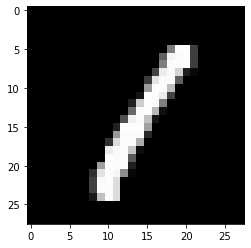

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
from numpy import unique, argmax


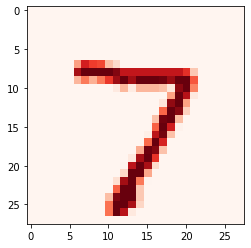

In [ ]:
plt.imshow(np.squeeze(x_test[0]),cmap="Reds")

In [ ]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

7


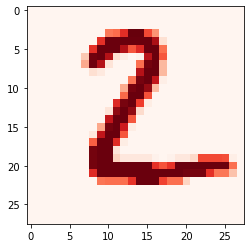

In [ ]:
plt.imshow(np.squeeze(x_test[1]),cmap="Reds")

In [ ]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

2
